In [9]:

import os, types
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TmuSCo_KXUT8c7-ufLYl420cup9vSrqxeH8avpNjtsxW',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'energyconsumption-donotdelete-pr-f2fduqqhkntabx'
object_key = 'long_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df



,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9
...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,05/12/2020 00:00:00,2.5
16595,Meghalaya,NER,25.570492,91.880014,05/12/2020 00:00:00,5.8
16596,Mizoram,NER,23.710399,92.720015,05/12/2020 00:00:00,1.6
16597,Nagaland,NER,25.666998,94.116570,05/12/2020 00:00:00,2.1


In [12]:
print(df.head())        #Top five rows from data sets

      States Regions   latitude  longitude                Dates  Usage
0     Punjab      NR  31.519974  75.980003  02/01/2019 00:00:00  119.9
1    Haryana      NR  28.450006  77.019991  02/01/2019 00:00:00  130.3
2  Rajasthan      NR  26.449999  74.639981  02/01/2019 00:00:00  234.1
3      Delhi      NR  28.669993  77.230004  02/01/2019 00:00:00   85.8
4         UP      NR  27.599981  78.050006  02/01/2019 00:00:00  313.9


In [13]:
df.columns       #Top all columns names

Index(['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage'], dtype='object')

In [14]:
df.shape         # how many rows and columns

(16599, 6)

In [15]:
df.info()       #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [16]:
df.dtypes         # Which type of data their 

States        object
Regions       object
latitude     float64
longitude    float64
Dates         object
Usage        float64
dtype: object

In [17]:
States_df=df['States']          #Top five states name shows

In [18]:
States_df.head()

0       Punjab
1      Haryana
2    Rajasthan
3        Delhi
4           UP
Name: States, dtype: object

In [19]:
df.tail()                 # Last five all data shows

,States,Regions,latitude,longitude,Dates,Usage
16594,Manipur,NER,24.799971,93.950017,05/12/2020 00:00:00,2.5
16595,Meghalaya,NER,25.570492,91.880014,05/12/2020 00:00:00,5.8
16596,Mizoram,NER,23.710399,92.720015,05/12/2020 00:00:00,1.6
16597,Nagaland,NER,25.666998,94.116570,05/12/2020 00:00:00,2.1
16598,Tripura,NER,23.835404,91.279999,05/12/2020 00:00:00,3.3


In [20]:
subset=df[['States','Regions','Dates']]           # Top five state, region, dates shows
print(subset.head())

      States Regions                Dates
0     Punjab      NR  02/01/2019 00:00:00
1    Haryana      NR  02/01/2019 00:00:00
2  Rajasthan      NR  02/01/2019 00:00:00
3      Delhi      NR  02/01/2019 00:00:00
4         UP      NR  02/01/2019 00:00:00


In [21]:
print(subset.tail())                          

          States Regions                Dates
16594    Manipur     NER  05/12/2020 00:00:00
16595  Meghalaya     NER  05/12/2020 00:00:00
16596    Mizoram     NER  05/12/2020 00:00:00
16597   Nagaland     NER  05/12/2020 00:00:00
16598    Tripura     NER  05/12/2020 00:00:00


In [22]:
print(df.loc[0])

States                    Punjab
Regions                       NR
latitude               31.519974
longitude              75.980003
Dates        02/01/2019 00:00:00
Usage                      119.9
Name: 0, dtype: object


In [23]:
print(df.tail(n=1))

        States Regions   latitude  longitude                Dates  Usage
16598  Tripura     NER  23.835404  91.279999  05/12/2020 00:00:00    3.3


In [24]:
print(df.loc[[0,100,1000]])

       States Regions   latitude  longitude                Dates  Usage
0      Punjab      NR  31.519974  75.980003  02/01/2019 00:00:00  119.9
100   Haryana      NR  28.450006  77.019991  05/01/2019 00:00:00  127.5
1000  Gujarat      WR  22.258700  71.192400  02/02/2019 00:00:00  217.1


In [25]:
print(df.iloc[1])

States                   Haryana
Regions                       NR
latitude               28.450006
longitude              77.019991
Dates        02/01/2019 00:00:00
Usage                      130.3
Name: 1, dtype: object


In [26]:
print(df.iloc[90])

States               West Bengal
Regions                       ER
latitude                22.58039
longitude              88.329947
Dates        04/01/2019 00:00:00
Usage                      106.8
Name: 90, dtype: object


In [27]:
print(df.iloc[-1])

States                   Tripura
Regions                      NER
latitude               23.835404
longitude              91.279999
Dates        05/12/2020 00:00:00
Usage                        3.3
Name: 16598, dtype: object


In [28]:
print(df.iloc[[0,100,1000]])

       States Regions   latitude  longitude                Dates  Usage
0      Punjab      NR  31.519974  75.980003  02/01/2019 00:00:00  119.9
100   Haryana      NR  28.450006  77.019991  05/01/2019 00:00:00  127.5
1000  Gujarat      WR  22.258700  71.192400  02/02/2019 00:00:00  217.1


In [29]:
energy = df.copy()

In [30]:
energy.describe()


,latitude,longitude,Usage
count,16599.000000,16599.000000,16599.000000
mean,23.178220,81.794533,103.001862
std,6.146575,7.258429,116.044056
min,8.900373,71.192400,0.300000
25%,19.820430,76.569993,6.700000
50%,23.835404,78.570026,64.400000
75%,27.333330,88.329947,173.900000
max,33.450000,94.216667,522.100000


In [31]:
pd.crosstab(index=energy['States'],columns='Count',dropna=True)

col_0,Count
States,
Andhra Pradesh,503
Arunachal Pradesh,503
Assam,503
Bihar,503
Chandigarh,503
Chhattisgarh,503
DNH,503
Delhi,503
Goa,503


Text(0, 0.5, 'Usage')

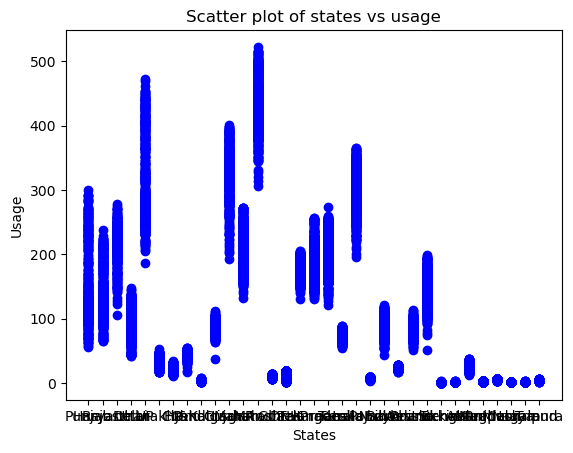

In [32]:
plt.scatter(energy['States'],energy['Usage'], c='blue')
plt.title('Scatter plot of states vs usage')
plt.xlabel('States')
plt.ylabel('Usage')

TypeError: can't multiply sequence by non-int of type 'float'

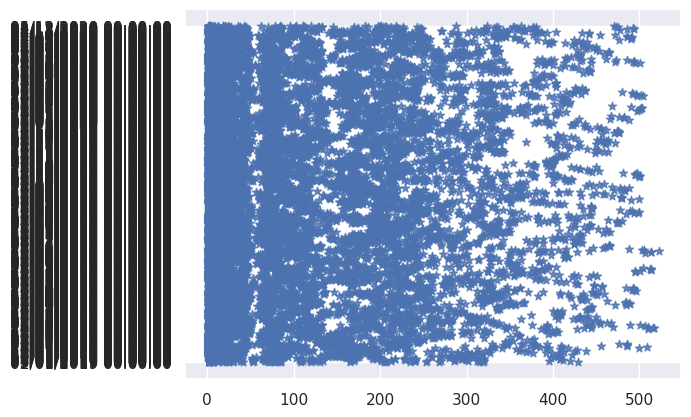

In [33]:
import seaborn as sns
sns.set(style="darkgrid")
sns.regplot(x=energy['Usage'],y=energy['Dates'],fit_reg=True, marker="*")

In [ ]:
sns.displot(energy['States'])
